# Covid-19 : The World Threat

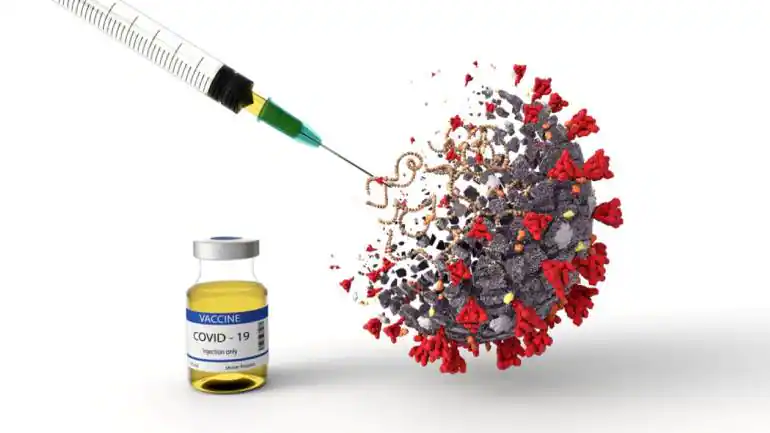)

This Notebook basically aims to visualize the coronavirus outbreak trends.

Here we would be visualizing
1. Rise in cases, 
2. Active cases, 
3. Death rates , 
4. Vaccination rate for world wide countries and 
5. Visualizations for India.

# Table of contents

1. [Importing Libraries](#first)
2. [Working with dataset](#second)

    2.1 [Reading dataset](#2.1)
    
    2.2 [Checking for misssing values](#2.2)
    
    2.3 [Combining the above dataframes into single dataframe](#2.3)
    
3. [Visualisations](#third)

    3.1 [Correlation of data](#3.1)
    
    3.2 [Confirmed Cases for Top 20 Countries](#3.2)
    
    3.3 [Active Cases for Top 20 Countries](#3.3)
    
    3.4 [Total Deaths for Top 20 countries](#3.4)
    
    3.5 [Death Rate Worldwide](#3.5)
    
    3.6 [Total Recovered for Top 20 countries](#3.6)
    
    3.7 [Comparing Total Confirmed with Total Recovered for Top 20 sorted based on Total_confirmed cases](#3.7)
    
    3.8 [ Comparing Total Recovered with the Active Cases for Top 20 sorted on Total_recovered cases](#3.8)
    
    3.9 [Bar and Line Plots for Daily Rise in Cases](#3.9)
    
    3.10 [Highest Number of people vaccinated(Fully & one dose) countrywise for Top 20 Countries](#3.10)
    
    3.11 [Vaccine brands used](#3.11)
    
4. [Analysis for India](#fourth)

    4.1 [Active cases and Daily new deaths](#4.1)
    
    4.2 [Daily Vaccinations](#4.2)
    
    4.3 [Daily vaccination and daily new cases using Joint Plot](#4.3)
    
    4.4 [Overall summary for India using Pair plot](#4.4)

# 1. Importing the libraries required
<a id="first"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime
import matplotlib.patches as mpatches

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 2. Working with dataset
<a id=second></a>

## 2.1 Reading the datasets
<a id = 2.1></a>

In [ ]:
summary_cases = pd.read_csv("../input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv")
vaccination = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
daily_cases = pd.read_csv("../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv")

In [ ]:
summary_cases.info()

In [ ]:
daily_cases.info()

In [ ]:
vaccination.info()

## 2.2 Checking for missing values
<a id=2.2></a>

In [ ]:
plt.figure(figsize=(19, 4)) # Set the size of the visualizations
plt.subplot(1, 3, 1) # Set the number of columns, rows and the position of the graph
sns.heatmap(vaccination.isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values vaccination')
plt.subplot(1, 3, 2)# Set the number of columns, rows and the position of the graph
sns.heatmap(summary_cases.isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values covid summary')        
plt.subplot(1, 3, 3)# Set the number of columns, rows and the position of the graph
sns.heatmap(daily_cases.isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values covid daily')
plt.show()

## So there are many null values present in the above 3 datasets 
### Replacing these null values with 0

In [ ]:
total = summary_cases.isnull().sum().sort_values(ascending=False)
percent = (summary_cases.isnull().sum()/summary_cases.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data

In [ ]:
summary_cases = summary_cases.replace(np.nan,0)

In [ ]:
total = daily_cases.isnull().sum().sort_values(ascending=False)
percent = (daily_cases.isnull().sum()/daily_cases.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data.head(20)

In [ ]:
daily_cases = daily_cases.replace(np.nan,0)

In [ ]:
total = daily_cases.isnull().sum().sort_values(ascending=False)
percent = (vaccination.isnull().sum()/daily_cases.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data.head(20)

In [ ]:
vaccination = vaccination.replace(np.nan,0)

Now there are no null values left

## 2.3 Combining the above dataframes into single dataframe
<a id=2.3></a>

In [ ]:
# function to easily agrregate columns
def aggregate(df: pd.Series, agg_col: str) -> pd.DataFrame:
    
    data = df.groupby("country")[agg_col].max()
    data = pd.DataFrame(data)
    
    return data

In [ ]:
# define the columns we want to summarize
cols_to_summarize = ['people_vaccinated', 
                     'people_vaccinated_per_hundred', 
                     'people_fully_vaccinated', 
                     'people_fully_vaccinated_per_hundred', 
                     'total_vaccinations_per_hundred', 
                     'total_vaccinations']
cols = ['daily_new_cases','daily_new_deaths']

summary = summary_cases.set_index("country")
vaccines = vaccination[['country', 'vaccines']].drop_duplicates().set_index('country')
summary = summary.join(vaccines)
# summary = pd.merge(vaccination, daily_cases, on=['date'], how='inner')

for col in cols_to_summarize:   
    summary = summary.join(aggregate(vaccination, col))

for col in cols:   
    summary = summary.join(aggregate(daily_cases, col))
    
summary['percentage_vaccinated'] = summary.total_vaccinations / summary.population * 100
summary['tested_positive'] = summary.total_confirmed / summary.total_tests * 100

In [ ]:
summary.reset_index(level=0, inplace=True)

In [ ]:
summary

Dropping unwanted columns

In [ ]:
summary = summary.drop(['serious_or_critical','total_cases_per_1m_population','total_deaths_per_1m_population','total_tests_per_1m_population'],axis=1)

In [ ]:
summary.info()

In [ ]:
summary

# 3. VISUALISATIONS
<a id=third></a>

## 3.1 Correlation of Data
<a id=3.1></a>

In [ ]:
data = summary.reset_index().dropna(subset=['vaccines','country'])
plt.subplots(figsize=(15, 15))
sns.heatmap(summary.corr() , annot=True, square=True )
plt.show()

## 3.2 Confirmed Cases for Top 20 Countries
<a id=3.1></a>

In [ ]:
top_20 = summary.groupby('country')['total_confirmed'].max().sort_values(ascending = False).head(20)
top_20.plot(x='country',y=['total_confirmed'],kind = "bar",figsize = (12 , 6),color = "brown",title="Total confirmed Cases")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

## 3.3 Active Cases for Top 20 Countries
<a id=3.3></a>

In [ ]:
top_20 = summary.groupby('country')['active_cases'].max().sort_values(ascending = False).head(20)
top_20.plot(x='country',y=['active_cases'],kind = "bar",figsize = (12 , 6),colormap = "Accent",title="Total active cases")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

## 3.4 Total Deaths for Top 20 countries
<a id=3.4></a>

In [ ]:
top_20 = summary.groupby('country')['total_deaths'].max().sort_values(ascending = False).head(20)
top_20.plot(x='country',y=['total_deaths'],kind = "bar",figsize = (12 , 6),colormap = "plasma",title="Total Deaths")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

## 3.5 Death Rate Worldwide
<a id=3.5></a>

In [ ]:
title="Death Summary"
death = summary.copy()
death['death_rate'] =  death['total_deaths']*100/death['total_confirmed']
death = death.dropna(subset=['death_rate'])
fig = px.scatter_geo(death, locations="country", color="continent",
                     locationmode='country names',
                     hover_name="country", size="death_rate",
                     projection="natural earth")
fig.update_layout(title=title, title_x=0.45)
fig.show()

## 3.6 Total Recovered for Top 20 countries
<a id=3.6></a>

In [ ]:
top_20 = summary.groupby('country')['total_recovered'].max().sort_values(ascending = False).head(20)
top_20.plot(x='country',y=['total_recovered'],kind = "bar",figsize = (12 , 6),colormap = "summer",title="Total Recovered")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

## 3.7 Comparing Total Confirmed with Total Recovered for Top 20 sorted based on Total_confirmed cases
<a id=3.7></a>

In [ ]:
top_20 = summary.sort_values('total_confirmed',ascending = False).head(20)
top_20.plot(x='country',y=['total_recovered','total_confirmed'],kind = "bar",figsize = (20 , 10),ylabel="Cases",
            title = "Total_confirmed vs. Total_recovered",colormap='rainbow')
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

## 3.8 Comparing Total Recovered with the Active Cases for Top 20 sorted on Total_recovered cases
<a id=3.8></a>

In [ ]:
top_20 = summary.sort_values('total_recovered',ascending = False).head(10)
top_20.plot(x='country',y=['total_recovered','active_cases'],kind = "bar",figsize = (20 , 10),ylabel="Cases"
            ,title = "Total_recovered vs. Active cases",colormap='Spectral')
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

# 3.9 Bar and Line Plots for Daily Rise in Cases
<a id=3.9></a>

In [ ]:
rise=pd.DataFrame(daily_cases.groupby('date')['daily_new_cases'].sum())
rise = rise.reset_index()
fig = px.bar(rise, x='date', y='daily_new_cases',width=700, height=400)
fig.show()

In [ ]:
fig = px.line(daily_cases, x="date", y="daily_new_cases", color='country',title= "Daily rise in cases")
fig.show()

## 3.10 Highest Number of people vaccinated(Fully & one dose) countrywise for Top 20 Countries
<a id=3.10></a>

In [ ]:
fully=summary.groupby('country')['people_vaccinated','people_fully_vaccinated'].max().sort_values(by='people_vaccinated',ascending = False).head(20)
fully['total'] = fully['people_vaccinated'] + fully['people_fully_vaccinated']

fully

In [ ]:
fully.reset_index(level=0, inplace=True)

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = fully['country'], y = fully['total'], color = "red")

bottom_plot = sns.barplot(x = fully['country'], y = fully['people_fully_vaccinated'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Fully vaccinated', 'Vaccinated with One dose'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("Vaccination Rate")
bottom_plot.set_xlabel("Country")

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    
plt.xticks(rotation=45)

## Percentage of people full vaccinated and people vaccinated for only one dose

Here percentage is calculated using overall population of country i.e. **number of vaccinations / total population of country**

In [ ]:
summary['per_one_dose'] = summary.people_vaccinated / summary.population * 100
summary['full_vaccinated'] = summary.people_fully_vaccinated / summary.population * 100
summary

In [ ]:
full = summary.groupby('country')['full_vaccinated'].max().sort_values(ascending = False).head(50)
one_dose = summary.groupby('country')['per_one_dose'].max().sort_values(ascending = False).head(50)

In [ ]:
full.plot(x='country',y=['full'],kind = "bar",figsize = (20 , 10),ylabel="Percentage of population fully vaccinated "
            ,title = "Percentage of fully vaccinated",colormap='tab20b')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

In [ ]:
one_dose.plot(x='country',kind = "bar",figsize = (20 , 10),ylabel="Percentage of population vaccinated with one dose"
            ,title = "Percentage of people vaccinated with one dose",colormap='tab20b')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)

# 3.11 Vaccine brands used
<a id=3.11></a>

In [ ]:
pd.DataFrame(summary.groupby("country")[["vaccines"]].max())

In [ ]:
daily = vaccination.loc[:,['country', 'date', 'vaccines', 'daily_vaccinations']].dropna(subset=['daily_vaccinations'])
daily["date"] = pd.to_datetime(daily["date"], format = '%Y-%m-%d')

daily_agg = daily.groupby('country').daily_vaccinations.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')



full_daily = daily.merge(daily_agg, on = 'country')
full_daily

In [ ]:
vaccines = summary.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

In [ ]:
title = "Popular Vaccines"
data = full_daily
fig = px.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccines", 
            hover_name="country", 
                   )


fig.update_layout(title=title, 
            title_x=0.5,
            legend_orientation = 'h'
)
fig.show()

# 4. Analysis for India
<a id=fourth></a>

## 4.1 Active cases and Daily new deaths
<a id=4.1></a>

In [ ]:
india = daily_cases[daily_cases['country']=='India']
fig = make_subplots(rows=2, cols=1,subplot_titles=('Active Cases','Daily New Deaths'))

fig.add_trace(go.Bar(x=india['date'].values, y=india['active_cases'].values,showlegend=False),
              row=1, col=1)

fig.add_trace(go.Bar(x=india['date'].values, y=india['daily_new_deaths'].values,showlegend=False),
              row=2, col=1)
fig.update_layout(height=800, width=700)
fig.show()

## 4.2 Daily Vaccinations
<a id=4.2></a>

In [ ]:
df = vaccination[vaccination['country']=='India']
plt.figure(figsize=(8,5))
sns.distplot(df.daily_vaccinations/1000, kde=True, color='green')
plt.xlabel('Daily Vaccinations(x1000)')

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(df.date, df.daily_vaccinations)
locs, labels = plt.xticks()
x_labels = [x for x in range(len(labels)) if x%5==0] + [0]
plt.xticks(x_labels, rotation='45')
plt.title("Daily Vaccination")

## 4.3 Daily vaccination and daily new cases using Joint Plot
<a id=4.3></a>

In [ ]:
summary = vaccination[vaccination['country']=='India']
combine = pd.merge(india,summary, on = "country")

In [ ]:
plt.figure(figsize=(15,12))
sns.jointplot(x="daily_new_cases", y="daily_vaccinations", data=combine)
plt.show()

## 4.4 Overall summary for India using Pair plot
<a id=4.4></a>

In [ ]:
sns.pairplot(india)